# 출생 관련 데이터 검증

> 통계청 데이터를 기반으로 출생아수 감소 관련 기사 및 사실을 검증하고자 합니다. 해당 노트는 통계청 데이터를 기반으로 진행됩니다.

## 절차
- 통계청에서 데이터를 획득
- 제공된 데이터를 가공
- 출생아수 감소 확인

## 데이터 가공

In [156]:
!pip install koreanize_matplotlib

In [157]:
import pandas as pd
import matplotlib.pyplot as plt
import koreanize_matplotlib

### 시계열 데이터를 일반 데이터로 변환

In [158]:
df = pd.read_csv("kosis_202401.csv")

In [159]:
df.head(1)

,시군구별,1997.01,1997.01.1,1997.01.2,1997.02,1997.02.1,1997.02.2,1997.03,1997.03.1,1997.03.2,...,2022.09.2,2022.10,2022.10.1,2022.10.2,2022.11,2022.11.1,2022.11.2,2022.12,2022.12.1,2022.12.2
0,시군구별,계 (명),남자 (명),여자 (명),계 (명),남자 (명),여자 (명),계 (명),남자 (명),여자 (명),...,여자 (명),계 (명),남자 (명),여자 (명),계 (명),남자 (명),여자 (명),계 (명),남자 (명),여자 (명)


In [160]:
df = df.melt(id_vars="시군구별")
df.head(1)

,시군구별,variable,value
0,시군구별,1997.01,계 (명)


In [161]:
df = df[df["시군구별"] != "시군구별"].copy()

In [162]:
df.head(1)

,시군구별,variable,value
1,전국,1997.01,63268


In [163]:
df["연도"] = df["variable"].str.split(".", expand=True)[0]
df["월"] = df["variable"].str.split(".", expand=True)[1]
df["성별"] = df["variable"].str.split(".", expand=True)[2]

In [164]:
df.head(3)

,시군구별,variable,value,연도,월,성별
1,전국,1997.01,63268,1997,01,None
2,서울특별시,1997.01,13205,1997,01,None
3,부산광역시,1997.01,4201,1997,01,None


In [165]:
df.tail(3)

,시군구별,variable,value,연도,월,성별
17781,경상북도,2022.12.2,366,2022,12,2
17782,경상남도,2022.12.2,503,2022,12,2
17783,제주특별자치도,2022.12.2,121,2022,12,2


In [166]:
df["성별"] = df["성별"].fillna("전체")
df["성별"] = df["성별"].replace("2", "여성")
df["성별"] = df["성별"].replace("1", "남성")

In [167]:
df["성별"].unique()

array(['전체', '남성', '여성'], dtype=object)

In [168]:
df.head(3)

,시군구별,variable,value,연도,월,성별
1,전국,1997.01,63268,1997,01,전체
2,서울특별시,1997.01,13205,1997,01,전체
3,부산광역시,1997.01,4201,1997,01,전체


In [169]:
df = df.rename(columns={"variable": "기간"})
df = df.rename(columns={"value": "출생아수"})

In [170]:
df.head()

,시군구별,기간,출생아수,연도,월,성별
1,전국,1997.01,63268,1997,01,전체
2,서울특별시,1997.01,13205,1997,01,전체
3,부산광역시,1997.01,4201,1997,01,전체
4,대구광역시,1997.01,3345,1997,01,전체
5,인천광역시,1997.01,3646,1997,01,전체


In [171]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16848 entries, 1 to 17783
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   시군구별    16848 non-null  object
 1   기간      16848 non-null  object
 2   출생아수    16848 non-null  object
 3   연도      16848 non-null  object
 4   월       16848 non-null  object
 5   성별      16848 non-null  object
dtypes: object(6)
memory usage: 921.4+ KB


In [172]:
# 문자 -> 숫자
import numpy as np
df["출생아수"] = df["출생아수"].replace("-", np.nan)
df["출생아수"] = df["출생아수"].astype(float)
df["연도"] = df["연도"].astype(int)
df["월"] = df["월"].astype(int)

In [173]:
df.describe()

,출생아수,연도,월
count,16308.000000,16848.000000,16848.000000
mean,2898.333579,2009.500000,6.500000
std,6406.925280,7.500223,3.452155
min,30.000000,1997.000000,1.000000
25%,589.000000,2003.000000,3.750000
50%,980.000000,2009.500000,6.500000
75%,1833.250000,2016.000000,9.250000
max,63268.000000,2022.000000,12.000000


In [174]:
# 데이터를 분석에 편리하게 변경하는 과정
# => pandas (파이썬 몰라도 됨)

In [175]:
df.head(5)

,시군구별,기간,출생아수,연도,월,성별
1,전국,1997.01,63268.0,1997,1,전체
2,서울특별시,1997.01,13205.0,1997,1,전체
3,부산광역시,1997.01,4201.0,1997,1,전체
4,대구광역시,1997.01,3345.0,1997,1,전체
5,인천광역시,1997.01,3646.0,1997,1,전체


In [176]:
df_all = df[(df["시군구별"] == "전국") & (df["성별"] == "전체")].copy()

In [177]:
df_all.head(5)

,시군구별,기간,출생아수,연도,월,성별
1,전국,1997.01,63268.0,1997,1,전체
58,전국,1997.02,58144.0,1997,2,전체
115,전국,1997.03,62160.0,1997,3,전체
172,전국,1997.04,56949.0,1997,4,전체
229,전국,1997.05,55270.0,1997,5,전체


<Axes: xlabel='연도,월'>

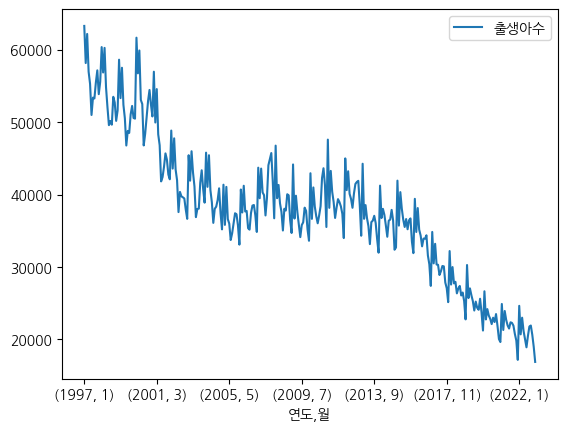

In [179]:
df_all.set_index(["연도", "월"]).plot()